# Capstone Project 2: Prediction

We have a models available for prediction.

The dataset is download from Kaggle. It is about house price. The goal will be use this dataset and build a predictive model for house pricing.

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

## The objective 
The objective of this project would be building a predictive model for house pricing. The result can be used to negotiate house price.
The modeling method can be logistic regression, random forest, gradient boosting, and SVM...
And compare them and pick the best performance one for prediction

### STEP1: Load the tools

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pickle
import xgboost

import warnings
warnings.filterwarnings('ignore')

### STEP2: Load the models

In [2]:
lasso_model = pickle.load(open('lasso_model.sav', 'rb'))
xgboost_dmatrix_model = pickle.load(open('xgboost_dmatrix_model.sav', 'rb'))

### STEP3: Load the data for prediction

In [3]:
dataset = pd.read_csv('dataset_4_prediction.csv')

In [4]:
dataset.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
# The features used for building the models
features = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF',
       'FullBath', 'TotRmsAbvGrd', 'YearBuilt']


In [6]:
df = dataset[features]

In [7]:
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageArea,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,5,896,882.0,730.0,896,1,5,1961
1,6,1329,1329.0,312.0,1329,1,6,1958
2,5,1629,928.0,482.0,928,2,6,1997
3,6,1604,926.0,470.0,926,2,7,1998
4,8,1280,1280.0,506.0,1280,2,5,1992


In [8]:
## 'OverallQual', 'FullBath', 'TotRmsAbvGrd' are converted to category data type and then get_dummies
df['OverallQual'] = df['OverallQual'].astype('category')
df['FullBath'] = df['FullBath'].astype('category')
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'].astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OverallQual   1459 non-null   category
 1   GrLivArea     1459 non-null   int64   
 2   TotalBsmtSF   1458 non-null   float64 
 3   GarageArea    1458 non-null   float64 
 4   1stFlrSF      1459 non-null   int64   
 5   FullBath      1459 non-null   category
 6   TotRmsAbvGrd  1459 non-null   category
 7   YearBuilt     1459 non-null   int64   
dtypes: category(3), float64(2), int64(3)
memory usage: 62.4 KB


#### check null values

In [10]:
df.isnull().sum()

OverallQual     0
GrLivArea       0
TotalBsmtSF     1
GarageArea      1
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df = pd.get_dummies(df, columns=['OverallQual', 'FullBath', 'TotRmsAbvGrd'])

In [13]:
df.head()

,GrLivArea,TotalBsmtSF,GarageArea,1stFlrSF,YearBuilt,OverallQual_1,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,...,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_13,TotRmsAbvGrd_15
0,896,882.0,730.0,896,1961,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1,1329,1329.0,312.0,1329,1958,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1629,928.0,482.0,928,1997,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,1604,926.0,470.0,926,1998,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1280,1280.0,506.0,1280,1992,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [14]:
df = df[df['TotRmsAbvGrd_15'] != 1].drop(columns='TotRmsAbvGrd_15')

In [15]:
df.columns

Index(['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'YearBuilt',
       'OverallQual_1', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4',
       'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8',
       'OverallQual_9', 'OverallQual_10', 'FullBath_0', 'FullBath_1',
       'FullBath_2', 'FullBath_3', 'FullBath_4', 'TotRmsAbvGrd_3',
       'TotRmsAbvGrd_4', 'TotRmsAbvGrd_5', 'TotRmsAbvGrd_6', 'TotRmsAbvGrd_7',
       'TotRmsAbvGrd_8', 'TotRmsAbvGrd_9', 'TotRmsAbvGrd_10',
       'TotRmsAbvGrd_11', 'TotRmsAbvGrd_12', 'TotRmsAbvGrd_13'],
      dtype='object')

##### The prediction data is slightly different from the training data 

#### scale the data for prediction

In [16]:
# load the scaler
scaler = pickle.load(open('scaler_NoLogTransform.sav', 'rb'))

In [17]:
X_test = scaler.transform(df.values)

In [23]:
X_test.shape

(1456, 31)

### STEP4: Prediction

In [18]:
y_lasso = lasso_model.predict(X_test)

In [22]:
pd.DataFrame(y_lasso).to_csv('y_lasso_less_feature.csv')

In [19]:
test_dmatrix = xgboost.DMatrix(data=X_test)
y_xgboost = xgboost_dmatrix_model.predict(test_dmatrix)

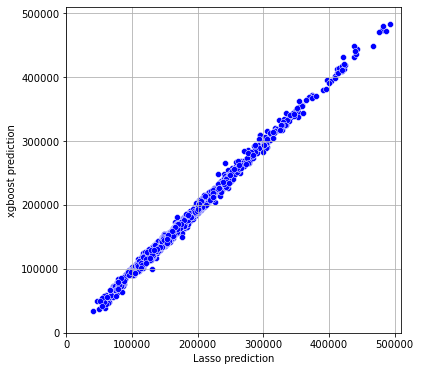

In [20]:
plt.figure(figsize=(6, 6))
sns.scatterplot(y_lasso, y_xgboost, color = 'blue');
plt.xlabel('Lasso prediction')
plt.ylabel('xgboost prediction')
plt.xlim(0, 510000)
plt.ylim(0, 510000)
plt.grid()

### Summary:
    I apply two models for the prediction. One is lasso model, and the other xgboost_dmatrix model. 
    They both give similar prediction as in the picture above.
    